# **EDA Exoplanetas y Vida extraterreste**


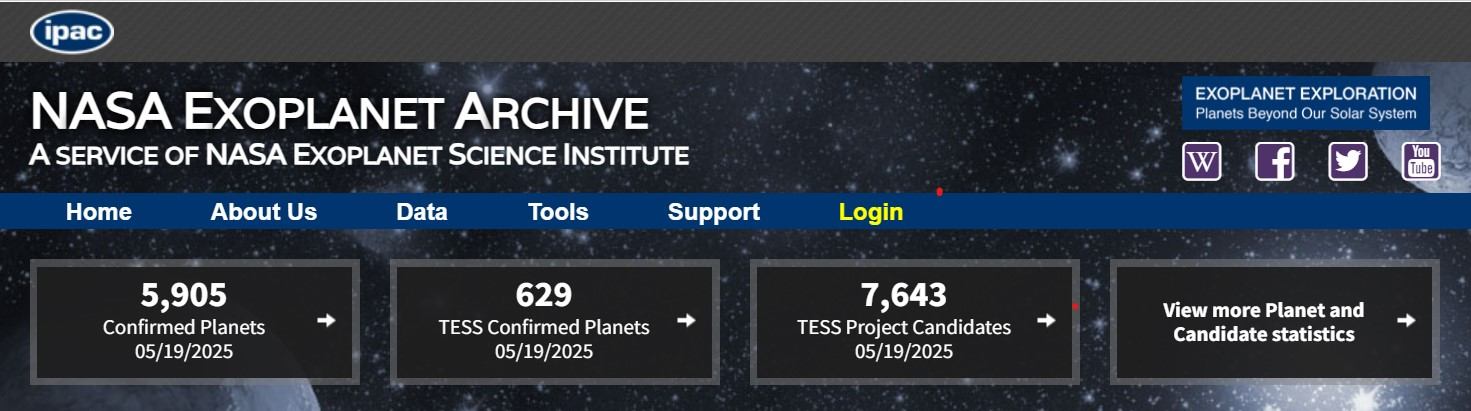

## ¿ Es posible demostrar con los datos de los que se dispone sobre exoplanetas confirmados las siguientes hipótesis?


🔬 **Hipótesis 1:**  
"Los exoplanetas ubicados dentro de la zona habitable de su estrella tienen mayor probabilidad de albergar condiciones aptas para la vida."  

*Análisis posible:*   
*Clasificar planetas en “dentro” y “fuera” de la zona habitable.*  
*Comparar sus propiedades (e.g., tipo, tamaño, masa) para evaluar la potencial habitabilidad.*   

🌍  **Hipótesis 2:**   
"Los exoplanetas rocosos con masas similares a la de la Tierra son los principales candidatos para albergar vida."  

*Análisis posible:*  
*Filtrar planetas con características similares a la Tierra.*  
*Cruzar con si están o no en la zona habitable.*  

☀️ **Hipótesis 3:**   
"Las estrellas de tipo espectral G (como el Sol) y K (enanas naranjas) son más propensas a tener planetas con condiciones aptas para la vida debido a su estabilidad y longevidad."  

*Análisis posible:* 
*Filtrar estrellas tipo G y K.*  
*Ver qué porcentaje de ellas tiene planetas en zona habitable y/o rocosos.*  


🌎 **Hipótesis 4:**   
"Los exoplanetas con órbitas casi circulares tienen mayores probabilidades de tener climas estables, lo cual favorece el desarrollo de vida."  

*Análisis posible:*  
*Clasificar exoplanetas en función de su excentricidad (e.g., < 0.2 = casi circular).*  
*Cruzar con masa, ubicación en zona habitable, tipo de estrella.*  

🪐 **Hipótesis 5:**   
"Los sistemas planetarios con múltiples planetas aumentan las probabilidades de que al menos uno de ellos se ubique en la zona habitable."  

*Análisis posible:*  
*Contar cuántos planetas tiene cada sistema.*  
*Ver si los sistemas con más planetas tienen al menos uno en zona habitable.*  


🌫 **Hipótesis 6:**   
"Los exoplanetas con atmósferas densas y estables podrían conservar agua líquida, lo cual favorece la posibilidad de vida."  

*Análisis posible:*  
*Filtrar planetas de tamaño medio (1–2 R⊕) con temperaturas compatibles con agua líquida (273–373 K).*  
*Identificar si alguno tiene datos atmosféricos disponibles. (esto va a ser lo más dificil porque la nasa no tiene datos, igaul los telescopios JWST o Hubble, pero tengo que mirar).*



Para ello se cuenta con los siguientes csv sacados de la página de la NASA y de KAGGEL  
[ ENLACE DE LA NASA ](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS)  
[ENLACE DE KAGGEL](https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets)

In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('nasa.csv', skiprows=96)
data ['discoverymethod'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Microlensing', 'Transit', 'Transit Timing Variations',
       'Astrometry', 'Disk Kinematics', 'Orbital Brightness Modulation',
       'Pulsation Timing Variations', 'Pulsar Timing'], dtype=object)

In [6]:
data ['discoverymethod'].value_counts()

discoverymethod
Transit                          34748
Radial Velocity                   2619
Microlensing                       709
Transit Timing Variations          156
Imaging                            151
Eclipse Timing Variations           24
Orbital Brightness Modulation       21
Pulsar Timing                       13
Astrometry                           5
Pulsation Timing Variations          2
Disk Kinematics                      1
Name: count, dtype: int64

In [7]:
data.head(10)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19
3,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04,2017-03,2018-09-06
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2009-10,2014-05-14
5,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25,2011-08,2014-07-23
6,14 And b,14 And,0,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-05-14,2008-12,2014-05-14
7,14 And b,14 And,1,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2023-09-19,2023-08,2023-09-19
8,14 And b,14 And,0,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,Published Confirmed,0,...,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826,2014-07-23,2011-08,2014-07-23
9,14 Her b,14 Her,0,1,2,Radial Velocity,2002,W. M. Keck Observatory,Published Confirmed,0,...,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351,2018-09-04,2017-03,2018-09-06


In [20]:
df1 = data.groupby ('pl_name').count()
df2 = df1.reset_index ()
df2

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,11 UMi b,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,14 And b,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,14 Her b,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
4,16 Cyg B b,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5898,ups And b,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
5899,ups And c,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
5900,ups And d,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
5901,ups Leo b,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5903 entries, 0 to 5902
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   pl_name          5903 non-null   object
 1   hostname         5903 non-null   int64 
 2   default_flag     5903 non-null   int64 
 3   sy_snum          5903 non-null   int64 
 4   sy_pnum          5903 non-null   int64 
 5   discoverymethod  5903 non-null   int64 
 6   disc_year        5903 non-null   int64 
 7   disc_facility    5903 non-null   int64 
 8   soltype          5903 non-null   int64 
 9   pl_controv_flag  5903 non-null   int64 
 10  pl_refname       5903 non-null   int64 
 11  pl_orbper        5903 non-null   int64 
 12  pl_orbpererr1    5903 non-null   int64 
 13  pl_orbpererr2    5903 non-null   int64 
 14  pl_orbperlim     5903 non-null   int64 
 15  pl_orbsmax       5903 non-null   int64 
 16  pl_orbsmaxerr1   5903 non-null   int64 
 17  pl_orbsmaxerr2   5903 non-null   

In [22]:
df2 ['discoverymethod'].value_counts()

discoverymethod
2     889
1     854
10    645
3     483
11    468
9     463
8     359
12    356
4     308
7     259
6     197
5     196
13    153
14     96
15     82
16     31
18     23
17     21
19      7
20      5
23      3
22      2
21      2
34      1
Name: count, dtype: int64

In [24]:
# AGRUPANDO POR NOMBRE DE PLANETAS
columnas_a_conservar = [
    'pl_name',        # nombre del planeta
    'pl_bmasse',      # masa terrestre
    'pl_rade',        # radio del planeta
    'pl_insol',       # irradiancia
    'pl_eqt',         # temperatura de equilibrio
    'pl_orbeccen',    # excentricidad orbital
    'pl_orbsmax',
    'sy_pnum',        # número de planetas en el sistema
    'sy_snum',
    'st_spectype',    # tipo espectral de la estrella
    'st_teff'        # temperatura de la estrella
]                       
df2_hipotesis = df2[columnas_a_conservar]
df2_hipotesis

,pl_name,pl_bmasse,pl_rade,pl_insol,pl_eqt,pl_orbeccen,pl_orbsmax,sy_pnum,sy_snum,st_spectype,st_teff
0,11 Com b,3,0,0,0,2,3,3,3,2,2
1,11 UMi b,3,0,0,0,2,3,3,3,1,2
2,14 And b,3,0,0,0,2,3,3,3,2,2
3,14 Her b,8,0,0,0,8,8,8,8,2,4
4,16 Cyg B b,6,0,0,0,6,6,6,6,2,5
...,...,...,...,...,...,...,...,...,...,...,...
5898,ups And b,7,0,0,0,7,7,7,7,4,4
5899,ups And c,6,0,0,0,6,6,6,6,3,3
5900,ups And d,6,0,0,0,6,6,6,6,3,3
5901,ups Leo b,1,0,0,0,1,1,1,1,1,1


In [25]:
# Guardar DF2 en un nuevo CSV con el método de descubrimiento
df2_hipotesis.to_csv('C:/Users/amaci/Documents/EDA_Astronomia/EDA-Astronomia/Notebooks/hipotesis_3.csv')

In [26]:
df2_hipotesis.head()

,pl_name,pl_bmasse,pl_rade,pl_insol,pl_eqt,pl_orbeccen,pl_orbsmax,sy_pnum,sy_snum,st_spectype,st_teff
0,11 Com b,3,0,0,0,2,3,3,3,2,2
1,11 UMi b,3,0,0,0,2,3,3,3,1,2
2,14 And b,3,0,0,0,2,3,3,3,2,2
3,14 Her b,8,0,0,0,8,8,8,8,2,4
4,16 Cyg B b,6,0,0,0,6,6,6,6,2,5


In [27]:
df2_hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5903 entries, 0 to 5902
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pl_name      5903 non-null   object
 1   pl_bmasse    5903 non-null   int64 
 2   pl_rade      5903 non-null   int64 
 3   pl_insol     5903 non-null   int64 
 4   pl_eqt       5903 non-null   int64 
 5   pl_orbeccen  5903 non-null   int64 
 6   pl_orbsmax   5903 non-null   int64 
 7   sy_pnum      5903 non-null   int64 
 8   sy_snum      5903 non-null   int64 
 9   st_spectype  5903 non-null   int64 
 10  st_teff      5903 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 507.4+ KB


# Columnas relevantes 1 Hipotesis: # 

# pl_insol #
: Insolación (flujo de radiación recibido por el planeta en unidades de flujo terrestre).

Valores cercanos a 1 (similar a la Tierra) pueden indicar zona habitable. (0.35 ≤ pl_insol ≤ 1.5) bibliografia

# pl_eqt #
: Temperatura de equilibrio del planeta (en Kelvin).

Rangos similares a la Tierra (~250-350 K) pueden ser indicativos.

# st_teff #
: Temperatura efectiva de la estrella (en Kelvin).

Ayuda a determinar la zona habitable de la estrella.

# pl_orbsmax #
: Semieje mayor de la órbita (en AU).

Combinado con st_teff, permite calcular la zona habitable.

In [60]:
# Filtrar filas sin valores nulos en las columnas clave
cols_necesarias = ["pl_insol", "pl_bmasse", "pl_eqt",'st_spectype']
df = df_hipotesis.dropna(subset=cols_necesarias)

print (df[cols_necesarias].dtypes)

pl_insol       float64
pl_bmasse      float64
pl_eqt         float64
st_spectype     object
dtype: object


In [61]:
# Definir la zona habitable como insolación entre 0.25 y 2 veces la de la Tierra
zona_habitable = df[(df["pl_insol"] >= 0.35) & (df["pl_insol"] <= 2)]

# Planetas fuera de la zona habitable
fuera_zona_habitable = df[(df["pl_insol"] < 0.35) | (df["pl_insol"] > 2)]

# Estadísticas comparativas
comparacion = {
    "Dentro Zona Habitable": zona_habitable[["pl_bmasse", "pl_eqt"]].describe(),
    "Fuera Zona Habitable": fuera_zona_habitable[["pl_bmasse", "pl_eqt"]].describe()
}

# Filtro de candidatos con condiciones similares a la Tierra
candidatos_vida = zona_habitable[
    (zona_habitable["pl_bmasse"] >= 0.8) & 
    (zona_habitable["pl_bmasse"] <= 10) &
    (zona_habitable["pl_eqt"] >= 200) &
    (zona_habitable["pl_eqt"] <= 320)
]

# Seleccionar columnas relevantes y ordenar
candidatos_vida_seleccion = candidatos_vida[["pl_name", "pl_bmasse", "pl_eqt", "pl_insol"]].sort_values(by="pl_eqt")

# Mostrar los 10 primeros candidatos
candidatos_vida_seleccion

,pl_name,pl_bmasse,pl_eqt,pl_insol
660,GJ 357 d,6.10,219.6,0.380
34676,LHS 1140 b,5.60,226.0,0.430
34679,LHS 1140 b,6.65,230.0,0.460
526,GJ 1002 b,1.08,230.9,0.670
35368,Proxima Cen b,1.27,234.0,0.650
3989,HN Lib b,5.46,234.4,0.503
38224,Wolf 1069 b,1.26,250.1,0.652
36016,TOI-2095 c,7.40,297.0,1.840
35621,TOI-1266 d,4.59,297.0,1.300
35442,Ross 128 b,1.40,301.0,1.380


# Columnas relevantes 2 Hipótesis:

# pl_bmasse
: Masa del planeta en masas terrestres (pl_bmasse).

Filtra planetas con masas entre ~0.8 y 10 masas terrestres (candidatos rocosos).

# pl_rade 
: Radio del planeta en radios terrestres (pl_rade).

Planetas con radios < 1.5 radios terrestres son más probables de ser rocosos.

In [62]:
# Filtrar masa similar a la Tierra (entre 0.8 y 1.5 masas terrestres)
masa_tierra = df[(df["pl_bmasse"] >= 0.8) & (df["pl_bmasse"] <= 10)]

# Adicionalmente, filtrar zona habitable y temperatura adecuada
candidatos_vida = masa_tierra[
    (masa_tierra["pl_insol"] >= 0.35) & (masa_tierra["pl_insol"] <= 2) &
    (masa_tierra["pl_eqt"] >= 200) & (masa_tierra["pl_eqt"] <= 320)
]


# Columnas relevantes 3 Hipótesis:

# st_spectype
: Tipo espectral de la estrella.

Filtra por tipos G (como el Sol) y K (enanas naranjas).

# st_teff
: Temperatura efectiva de la estrella.

Estrellas G: ~5,300–6,000 K; estrellas K: ~3,900–5,300 K.

In [63]:
df = df.dropna(subset=["pl_bmasse", "pl_eqt", "pl_insol", "st_spectype"]).copy()
df["st_spectype"] = df["st_spectype"].astype(str).str.upper().str.strip()

# Filtrar planetas habitables
habitables = df[
    (df["pl_bmasse"] >= 0.5) & (df["pl_bmasse"] <= 10) &
    (df["pl_eqt"] >= 200) & (df["pl_eqt"] <= 320) &
    (df["pl_insol"] >= 0.35) & (df["pl_insol"] <= 2)
]

# Dividir por tipo espectral
habitables_GK = habitables[habitables["st_spectype"].str.startswith(("G", "K"))]
habitables_otras = habitables[~habitables["st_spectype"].str.startswith(("G", "K"))]

habitables_GK

,pl_name,pl_bmasse,pl_rade,pl_insol,pl_eqt,pl_orbeccen,pl_orbsmax,sy_pnum,sy_snum,st_spectype,st_teff


# Columnas relevantes 4 Hipótesis:

# pl_orbeccen
: Excentricidad orbital del planeta.

Valores cercanos a 0 (ej. < 0.1) indican órbitas casi circulares.



In [66]:

# Clasificar órbitas
df_clean = df.copy()
df_clean = df_clean[df_clean['pl_orbeccen'].notnull()]
df_clean['orbital_type'] = np.where(df_clean['pl_orbeccen'] < 0.2, 'Casi circular', 'Excéntrica')

# Filtrar exoplanetas con datos suficientes para análisis de habitabilidad
df_filtered = df_clean[
    df_clean[['pl_bmasse', 'pl_insol', 'pl_eqt', 'st_teff']].notnull().any(axis=1)
]

# Definir criterio de habitabilidad:
# - pl_insol entre 0.35 y 2 (zona habitable aproximada)
# - o temperatura de equilibrio entre 200K y 320K
# - y estrella con temperatura entre 5000K y 6000K (tipo solar)
df_filtered['in_habitable_zone'] = (
    ((df_filtered['pl_insol'].between(0.35, 2)) | (df_filtered['pl_eqt'].between(200, 320))) &
    (df_filtered['st_teff'].between(5000, 6000))
)
df_filtered


,pl_name,pl_bmasse,pl_rade,pl_insol,pl_eqt,pl_orbeccen,pl_orbsmax,sy_pnum,sy_snum,st_spectype,st_teff,orbital_type,in_habitable_zone
228,Barnard b,0.37,NaN,6.76,400.0,0.1600,0.02294,4,1,M3.5-4 V,3195.0,Casi circular,False
509,EPIC 249893012 b,8.75,1.950,1037.00,1616.0,0.0600,0.04700,3,1,G8 IV/V,5430.0,Casi circular,False
510,EPIC 249893012 c,14.67,3.670,160.00,990.0,0.0700,0.13000,3,1,G8 IV/V,5430.0,Casi circular,False
511,EPIC 249893012 d,10.18,3.940,53.00,752.0,0.1500,0.22000,3,1,G8 IV/V,5430.0,Casi circular,False
514,G 192-15 b,1.03,NaN,7.06,453.6,0.0000,0.01723,2,1,M5.0 V,NaN,Casi circular,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38317,YZ Cet c,1.14,NaN,4.72,410.3,0.0000,0.02156,3,1,M4.5 V,3151.0,Casi circular,False
38319,YZ Cet d,1.09,NaN,2.70,356.7,0.0700,0.02851,3,1,M4.5 V,3151.0,Casi circular,False
38401,pi Men c,4.82,2.042,309.00,1169.8,0.0000,0.06839,3,1,G0 V,6037.0,Casi circular,False
38408,rho CrB b,332.10,NaN,34.70,614.0,0.0373,0.21960,4,1,G0 V,5627.0,Casi circular,False


In [ ]:
# Estadísticas comparativas
hab_stats = df_filtered.groupby('orbital_type')['in_habitable_zone'].agg(['count', 'sum', 'mean'])
hab_stats.rename(columns={'count': 'Total', 'sum': 'Habitables', 'mean': 'Proporción'}, inplace=True)

# Columnas relevantes 5 Hipótesis:

# sy_pnum
: Número de planetas en el sistema.

# Sistemas con sy_pnum > 1 son multiplanetarios.

pl_insol o pl_eqt: Para verificar si alguno de los planetas está en la zona habitable.

In [30]:
# PARA ESTA HIPOTESIS COGEMOS EL CSV 3
data1 = pd.read_csv('hipotesis_3.csv')
data1

,Unnamed: 0,pl_name,pl_bmasse,pl_rade,pl_insol,pl_eqt,pl_orbeccen,pl_orbsmax,sy_pnum,sy_snum,st_spectype,st_teff
0,0,11 Com b,3,0,0,0,2,3,3,3,2,2
1,1,11 UMi b,3,0,0,0,2,3,3,3,1,2
2,2,14 And b,3,0,0,0,2,3,3,3,2,2
3,3,14 Her b,8,0,0,0,8,8,8,8,2,4
4,4,16 Cyg B b,6,0,0,0,6,6,6,6,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5898,5898,ups And b,7,0,0,0,7,7,7,7,4,4
5899,5899,ups And c,6,0,0,0,6,6,6,6,3,3
5900,5900,ups And d,6,0,0,0,6,6,6,6,3,3
5901,5901,ups Leo b,1,0,0,0,1,1,1,1,1,1


In [ ]:

# Extraer nombre del sistema (todo antes del primer espacio en pl_name)
data1['system_name'] = data1['pl_name'].str.extract(r'^([^\s]+)')

# Definir si el planeta está en la zona habitable:
# - Irradiancia entre 0.35 y 2 o temperatura de equilibrio entre 180K y 310K
# - Estrella tipo solar (temperatura entre 5000K y 6000K)
data1['in_habitable_zone'] = (
    ((data1['pl_insol'].between(0.35, 2)) | 
     (data1['pl_eqt'].between(200, 320))) &
    (data1['st_teff'].between(5000, 6000))
)

# Agrupar por sistema: tomar número de planetas y si hay alguno habitable
systems = data1.groupby('system_name').agg({
    'sy_pnum': 'first',
    'in_habitable_zone': 'max'  # True si al menos uno es habitable
}).rename(columns={'in_habitable_zone': 'has_habitable_planet'})

# Agrupar por cantidad de planetas y calcular estadísticas
result = systems.groupby('sy_pnum')['has_habitable_planet'].agg(['count', 'sum', 'mean'])
result.rename(columns={'count': 'Total Sistemas', 'sum': 'Con Habitables', 'mean': 'Proporción'}, inplace=True)
result


,Total Sistemas,Con Habitables,Proporción
sy_pnum,,,
1,251,0,0.0
2,521,0,0.0
3,235,0,0.0
4,180,0,0.0
5,115,0,0.0
6,135,0,0.0
7,195,0,0.0
8,302,0,0.0
9,397,0,0.0
